### POLISCI 88 FA 21

### Lab #: Who Punishes Extremist Nominees?

#### Due Date: X

### Candidate Ideology and Turning Out the Base in US Elections

The behavioral literature in American politics suggests that voters are not informed enough, and are too partisan, to be swing voters, while the institutional literature suggests that moderate candidates tend to perform better. We speak to this debate by examining the link between the ideology of congressional candidates and the turnout of their parties’ bases in US House races, 2006–2014. 

We will repoduce results from [this](https://www.cambridge.org/core/journals/american-political-science-review/article/who-punishes-extremist-nominees-candidate-ideology-and-turning-out-the-base-in-us-elections/366A518712BE9BCC1CB035BF53095D65) Hall and Thompson paper from the American Political Science Review. Specifically, we will be replicating Tables 1 and 2 and Figure 2 from the paper.

Combining a regression discontinuity design in close primary races with survey and administrative data on individual voter turnout, we will look at how extremist nominees effect their party’s share of turnout in the general election.

Run the following cell to import the libraries we will explore in this lab assignment.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt

### 1. Reading in the Stata File

#### Question 1.1

Read in the Stata dta file `rd_analysis_hs.dta` into a pandas dataframe with the name: `turnout`. You might find looking at [the documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_stata.html) helpful.

`rd_analysis_hs.dta` is the main analysis dataset. It contains data on general election results and turnout by district for districts with a competitive primary.

The `DataFrame.head()` method shows the first few lines of the dataframe. 

In [2]:
#Bring in the main analysis dataset
turnout = pd.read_stata("hall_thompson_replication_files/rd_analysis_hs.dta")
turnout.head()

,state,dist,dem,year,turnout_dem_strong,low_info_votes1,high_info_votes1,low_info_n1,high_info_n1,turnout_dem_nvstrong,...,re,g,pv,two_party_total,lag_pv,catalist_share,no_party_id,gov_elec,senate_elec,mindonors
0,AK,1.0,1.0,2008.0,0.777778,0.0,7.0,1.0,8.0,0.800000,...,0.0,1.0,0.391753,0.97,0.371134,0.161095,0.0,0.0,1.0,41316.0
1,AL,7.0,1.0,2006.0,0.500000,0.0,0.0,0.0,0.0,0.500000,...,0.0,6.0,0.646465,0.99,0.646465,NaN,1.0,1.0,0.0,500.0
2,AL,2.0,0.0,2008.0,0.600000,1.0,2.0,3.0,2.0,0.333333,...,0.0,2.0,0.636364,0.99,0.670000,NaN,1.0,0.0,1.0,16592.0
3,AL,5.0,1.0,2010.0,0.684211,4.0,8.0,8.0,9.0,0.125000,...,0.0,3.0,0.383838,0.99,0.383838,NaN,1.0,1.0,1.0,5000.0
4,AL,7.0,1.0,2010.0,0.652174,3.0,11.0,7.0,15.0,0.428571,...,0.0,6.0,0.727273,0.99,0.727273,NaN,1.0,1.0,1.0,38000.0


#### Question 1.2

Now that you've read in the dta file let's try some `pd.DataFrame` methods. To print out a list of all the column names in the dataframe use the `DataFrame.columns.values` method.

In [3]:
turnout.columns.values

array(['state', 'dist', 'dem', 'year', 'turnout_dem_strong',
       'low_info_votes1', 'high_info_votes1', 'low_info_n1',
       'high_info_n1', 'turnout_dem_nvstrong', 'low_info_votes2',
       'high_info_votes2', 'low_info_n2', 'high_info_n2',
       'turnout_dem_lean', 'low_info_votes3', 'high_info_votes3',
       'low_info_n3', 'high_info_n3', 'turnout_indep', 'low_info_votes4',
       'high_info_votes4', 'low_info_n4', 'high_info_n4',
       'turnout_rep_lean', 'low_info_votes5', 'high_info_votes5',
       'low_info_n5', 'high_info_n5', 'turnout_rep_rep_nvstrong',
       'low_info_votes6', 'high_info_votes6', 'low_info_n6',
       'high_info_n6', 'turnout_rep_strong', 'low_info_votes7',
       'high_info_votes7', 'low_info_n7', 'high_info_n7',
       'total_responses', 'total_turnout', 'turnout_dem', 'turnout_rep',
       'dem_turnout_share', 'rep_turnout_share', 'low_info_turnout',
       'high_info_turnout', 'dem_low_info_turnout_share',
       'rep_low_info_turnout_share', 'dem

### 2. Election Results and Turnout Data Cleaning

#### Question 2.1

Store the cutoff for the minimum distance between the moderate and extremists necessary to enter the sample in the variable `cutoff`.

Set `cutoff` equal to the median value of of "absdist" column from the dataframe.

Hint: Each column of the `pd.DataFrame` is made up of an array. As a reminder, you can access the arrays that make up the column by writing the name of the data frame followed by the variable name in square brackets as a string.

In [4]:
cutoff = turnout["absdist"].median()
cutoff

0.12193753

#### Question 2.2

Let's filter the dataframe to only contain values that are relevant for our regression. We will do this by creating conditions set on our original dataframe `turnout`.
Create a dataframe `less_than_ten` containing only values for which the absolute value of the `rv` column is less than ten percentage points. 

In [5]:
less_than_ten = turnout[np.abs(turnout.rv)<.1]
less_than_ten.head()

,state,dist,dem,year,turnout_dem_strong,low_info_votes1,high_info_votes1,low_info_n1,high_info_n1,turnout_dem_nvstrong,...,re,g,pv,two_party_total,lag_pv,catalist_share,no_party_id,gov_elec,senate_elec,mindonors
0,AK,1.0,1.0,2008.0,0.777778,0.0,7.0,1.0,8.0,0.800000,...,0.0,1.0,0.391753,0.97,0.371134,0.161095,0.0,0.0,1.0,41316.0
2,AL,2.0,0.0,2008.0,0.600000,1.0,2.0,3.0,2.0,0.333333,...,0.0,2.0,0.636364,0.99,0.670000,NaN,1.0,0.0,1.0,16592.0
4,AL,7.0,1.0,2010.0,0.652174,3.0,11.0,7.0,15.0,0.428571,...,0.0,6.0,0.727273,0.99,0.727273,NaN,1.0,1.0,1.0,38000.0
9,AR,1.0,1.0,2010.0,0.777778,4.0,10.0,7.0,11.0,0.700000,...,0.0,7.0,0.391753,0.97,0.391753,0.053922,1.0,1.0,1.0,6000.0
10,AR,2.0,1.0,2010.0,0.730769,4.0,15.0,9.0,17.0,0.266667,...,0.0,9.0,0.448980,0.98,0.448980,0.056127,1.0,1.0,1.0,39400.0


#### Question 2.3

Create a dataframe `greater_than_cutoff` containing only values for which the `absdist`column is greater than cutoff value.

In [6]:
greater_than_cutoff = turnout[turnout.absdist>cutoff]
greater_than_cutoff.head()

,state,dist,dem,year,turnout_dem_strong,low_info_votes1,high_info_votes1,low_info_n1,high_info_n1,turnout_dem_nvstrong,...,re,g,pv,two_party_total,lag_pv,catalist_share,no_party_id,gov_elec,senate_elec,mindonors
1,AL,7.0,1.0,2006.0,0.500000,0.0,0.0,0.0,0.0,0.500000,...,0.0,6.0,0.646465,0.99,0.646465,NaN,1.0,1.0,0.0,500.0
3,AL,5.0,1.0,2010.0,0.684211,4.0,8.0,8.0,9.0,0.125000,...,0.0,3.0,0.383838,0.99,0.383838,NaN,1.0,1.0,1.0,5000.0
5,AL,2.0,0.0,2010.0,0.600000,0.0,6.0,4.0,6.0,1.000000,...,0.0,2.0,0.636364,0.99,0.636364,NaN,1.0,1.0,1.0,250.0
9,AR,1.0,1.0,2010.0,0.777778,4.0,10.0,7.0,11.0,0.700000,...,0.0,7.0,0.391753,0.97,0.391753,0.053922,1.0,1.0,1.0,6000.0
10,AR,2.0,1.0,2010.0,0.730769,4.0,15.0,9.0,17.0,0.266667,...,0.0,9.0,0.448980,0.98,0.448980,0.056127,1.0,1.0,1.0,39400.0


#### Question 2.4

Create a dataframe `ten_and_cutoff` with both conditions from Question 2.2 and 2.3.

In [7]:
ten_and_cutoff = turnout[(np.abs(turnout.rv)<.1) & (turnout.absdist>cutoff)]
ten_and_cutoff.head()

,state,dist,dem,year,turnout_dem_strong,low_info_votes1,high_info_votes1,low_info_n1,high_info_n1,turnout_dem_nvstrong,...,re,g,pv,two_party_total,lag_pv,catalist_share,no_party_id,gov_elec,senate_elec,mindonors
9,AR,1.0,1.0,2010.0,0.777778,4.0,10.0,7.0,11.0,0.700000,...,0.0,7.0,0.391753,0.970,0.391753,0.053922,1.0,1.0,1.0,6000.0
10,AR,2.0,1.0,2010.0,0.730769,4.0,15.0,9.0,17.0,0.266667,...,0.0,9.0,0.448980,0.980,0.448980,0.056127,1.0,1.0,1.0,39400.0
14,AR,1.0,1.0,2012.0,0.500000,6.0,3.0,11.0,3.0,0.500000,...,1.0,8.0,0.373073,0.973,0.391753,0.047688,1.0,0.0,0.0,13000.0
17,AZ,2.0,1.0,2006.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,14.0,0.383838,0.990,0.383838,0.387636,0.0,1.0,1.0,960.0
19,AZ,8.0,0.0,2006.0,0.000000,0.0,0.0,0.0,0.0,0.100000,...,0.0,22.0,0.535353,0.990,0.535353,0.518953,0.0,1.0,1.0,84437.0


#### Question 2.5

We want to create [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of the filtered dataframes. Create new variables for each deep copy and drop all NaN values.

Hint: How can you check if your dataframe contains any NaN values? 

In [8]:
turnout_dc = turnout.copy(deep=True).dropna()
turnout_dc.isna().sum().sum()

0

In [9]:
less_than_ten_dc = less_than_ten.copy(deep=True).dropna()
less_than_ten_dc.isna().sum().sum()

0

In [10]:
greater_than_cutoff_dc = greater_than_cutoff.copy(deep=True).dropna()
greater_than_cutoff_dc.isna().sum().sum()

0

In [11]:
ten_and_cutoff_dc = ten_and_cutoff.copy(deep=True).dropna()
ten_and_cutoff_dc.isna().sum().sum()

0

### 3. Hall Estimates on Vote Share and Electoral Victory

We will first replicate the Hall estimates on vote share. We do this replication because our subsequent analyses will be using a smaller dataset that only includes election years since the beginning of the Cooperative Congressional Election Study (CCES) in 2006.

We will also refer back to these vote-share estimates later in interpreting the turnout estimates. Table 1 will present these estimates.

In the Hall and Thompson paper, TABLE 1 shows the effect of extremist mominee on party’s general-election vote share and victory for the US House from 2006–2014.

For this problem you will be creating the estimates on vote share. We will go through this process one column at a time. 

In order to perform a local linear ordinary least squares (OLS) we will use the `statsmodels` python library (imported at the start of the lab). Take a look at the [documentation](https://www.statsmodels.org/stable/example_formulas.html) to better understand how we will fit models using R-style formulas.

The cell below defines `model` as an ols regression that takes in two parameters: `formula` which accepts a string that describes the model and `data` which accepts a dataframe. 

The `results` fits the model. `cov_type` is the covariance type. `cov_kwds` is for coveriance keywwords, this is where you define what column of the dataframe you want to cluster on. In the Hall and Thompson paper robust standard errors clustered by district.

In [12]:
model = smf.ols(formula='vote_general ~ treat + rv + treat_rv', data=ten_and_cutoff)
results = model.fit(cov_type = 'cluster', cov_kwds={'groups': ten_and_cutoff['g']})

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_general   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     5.737
Date:                Mon, 19 Apr 2021   Prob (F-statistic):            0.00116
Time:                        10:17:25   Log-Likelihood:                 73.595
No. Observations:                 109   AIC:                            -139.2
Df Residuals:                     105   BIC:                            -128.4
Df Model:                           3                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5711      0.033     17.182      0.0

We will follow this workflow for creating the table.

#### Question 3.1 
Start by creating a new dataframe `vote_share`. 

In the first column we will use a local linear ordinary least squares (OLS) estimated separately on each side of the discontinuity, using only observations where the primary winner won by ten percentage points of less.

Assign `vote_share["c1"]` to the coefficient from the OLS regression results.

Hint: If you are unsure about what dataframe the `data` parameter will take in when doing your regression refer back to the filtered dataframes we created at the beginning of the lab assignment. Which ones contain data that is relevant for each of the columns needed to create Table 1?

In [14]:
#Table 1
vote_share = pd.DataFrame()
vote_share["c1"] = smf.ols(formula='vote_general ~ treat + rv + treat_rv', data=ten_and_cutoff).fit(cov_type = 'cluster', cov_kwds={'groups': ten_and_cutoff['g']}).params

#### Question 3.2 
Assign `vote_share["c2"]` to the coefficient from the OLS regression results using all the data with a third-order polynomial of the running variable.

In [15]:
vote_share["c2"] = smf.ols(formula='vote_general ~ treat + rv + rv2 + rv3', data=greater_than_cutoff).fit(cov_type = 'cluster', cov_kwds={'groups': greater_than_cutoff['g']}).params

#### Question 3.3
Assign `vote_share["c3"]` to the coefficient from the OLS regression results using all the data with a fifth-order polynomial of the running variable.

In [16]:
vote_share["c3"] = smf.ols(formula='vote_general ~ treat + rv + rv2 + rv3 + rv4 + rv5', data=greater_than_cutoff).fit(cov_type = 'cluster', cov_kwds={'groups': greater_than_cutoff['g']}).params

#### Question 3.4

In the fourth column, we use the automated bandwidth selection and kernel estimation from Calonico, Cattaneo, and Titiunik (2014).

In [17]:
vote_share["c4"] = smf.ols(formula='vote_general ~ rv', data=greater_than_cutoff).fit(cov_type = 'cluster', cov_kwds={'groups': greater_than_cutoff['g']}).params

In [18]:
vote_share

,c1,c2,c3,c4
Intercept,0.571126,0.576673,0.591576,0.578891
treat,-0.125614,-0.073253,-0.103788,NaN
rv,0.016220,0.082527,0.392000,-0.122190
treat_rv,1.437518,NaN,NaN,NaN


These first four columns are all on general-election vote share. 

#### Question 3.5
Create a dataframe `victory` for the final four columns of TABLE 1. The columns of `victory` replicate these specifications for electoral victory (an indicator) instead of vote share.

In [19]:
victory = pd.DataFrame()
victory["c5"] = smf.ols(formula='victory_general ~ treat + rv + treat_rv', data=ten_and_cutoff).fit(cov_type = 'cluster', cov_kwds={'groups': ten_and_cutoff['g']}).params 
victory["c6"] = smf.ols(formula='victory_general ~ treat + rv + rv2 + rv3', data=greater_than_cutoff).fit(cov_type = 'cluster', cov_kwds={'groups': greater_than_cutoff['g']}).params
victory["c7"] = smf.ols(formula='victory_general ~ treat + rv + rv2 + rv3 + rv4 + rv5', data=greater_than_cutoff).fit(cov_type = 'cluster', cov_kwds={'groups': greater_than_cutoff['g']}).params 
victory["c8"] = smf.ols(formula='victory_general ~ rv', data=greater_than_cutoff).fit(cov_type = 'cluster', cov_kwds={'groups': greater_than_cutoff['g']}).params
victory

,c5,c6,c7,c8
Intercept,0.615526,0.767987,0.793402,0.660412
treat,-0.388739,-0.362493,-0.447032,NaN
rv,-2.379339,1.026059,1.882502,-0.171869
treat_rv,7.339911,NaN,NaN,NaN


### 4. Effects on Partisian Turnout

Having documented the effect of extremist nominees on vote share, we now examine their effect on partisan turnout by studying the regression discontinuity graphically. 

#### Question 4.1

In the Hall and Thompson paper, FIGURE 2 shows the effect of extremist mominees on validated partisan turnout in the general election for the US House from 2006–2014. 

For this problem you will be creating a plot of binned averages of the extremist candidate’s winning margin in each primary race, on the horizontal axis, against the general-election vote share of the primary winner, on the vertical axis. 

Your final plot must have a title with both axes labeled (with meaningful names).

Hint: Plot the data and regression model fits across a FacetGrid using [`sns.regplot(...)`](https://seaborn.pydata.org/generated/seaborn.regplot.html). This method is used to plot data and a linear regression model fit. Think about how many calls you will need to make to `sns.regplot(...)`.

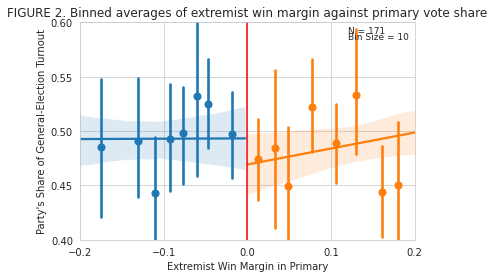

In [20]:
#Figure2: binned averages of extremist candidate's win margin in each primary (x) against general election vote share of primary winner (y)
sns.set_style("whitegrid")

fig, ax = plt.subplots()
sns.regplot(x="rv", y="turnout_party_share", data=turnout[turnout.rv<0], x_bins=10, ax=ax)
sns.regplot(x="rv", y="turnout_party_share", data=turnout[turnout.rv>=0], x_bins=10, ax=ax)
plt.axvline(color='r')

ax.set_title("FIGURE 2. Binned averages of extremist win margin against primary vote share")
ax.set(xlabel="Extremist Win Margin in Primary", ylabel="Party's Share of General-Election Turnout")
ax.set(xlim=(-0.2, 0.2), ylim=(0.40, 0.60), xticks=[-0.2, -0.1, 0.0, 0.1, 0.2], yticks=[0.40, 0.45, 0.50, 0.55, 0.60])

plt.text(0.12, 0.590, "N = 171", fontsize=9)
plt.text(0.12, 0.585, "Bin Size = 10", fontsize=9)
plt.show()

When a party nominates an extremist in its primary what is the efect on the general-election? Write your answer in the cell below.

Turnout skews towards the opposing party.

Looking at the plot you have created, what happens when the winning margin is above and below 0?

When the winning margin is above 0, to the right of the vertical line in the plot, the extremist candidate from among the top two primary candidates wins the race, and the party fields an extremist in the general election. When the winning margin is below 0, to the left of the vertical line in the plot, the moderate wins and stands in the general election instead. 

### 5. Formal Estimates

#### Question 5.1: TABLE 2. Effect of Extremist Nominee on Party’s General-Election Turnout, US House, 2006–2014

TABLE 2 shows the effect of extremist mominee on party’s general-election turnout for the US House from 2006–2014.

For this problem you will be creating the estimates on partisian share of turnout, using the same specifications as in the vote share RD. 

Hint: It might help to refer back to Question 3. Think about what part of the OLS regression will change for this problem. Also think about what data we want to pass in to the `data` parameter. Do we want to include data with NaN values?

In [21]:
#Table2: formal estimates using same specifications as vote share RD
partisan_share = pd.DataFrame() 
partisan_share["c1"] = smf.ols(formula="turnout_party_share ~ treat + rv + treat_rv", data=ten_and_cutoff_dc).fit(cov_type = 'cluster', cov_kwds={'groups': ten_and_cutoff_dc['g']}).params
partisan_share["c2"] = smf.ols(formula='turnout_party_share ~ treat + rv + rv2 + rv3', data=greater_than_cutoff_dc).fit(cov_type = 'cluster', cov_kwds={'groups': greater_than_cutoff_dc['g']}).params
partisan_share["c3"] = smf.ols(formula='turnout_party_share ~ treat + rv + rv2 + rv3 + rv4 + rv5', data=greater_than_cutoff_dc).fit(cov_type = 'cluster', cov_kwds={'groups': greater_than_cutoff_dc['g']}).params 
partisan_share["c4"] = smf.ols(formula='turnout_party_share ~ rv', data=greater_than_cutoff_dc).fit(cov_type = 'cluster', cov_kwds={'groups': greater_than_cutoff_dc['g']}).params
partisan_share

,c1,c2,c3,c4
Intercept,0.378427,0.480691,0.509661,0.502819
treat,0.038771,0.050295,-0.009888,NaN
rv,-2.420444,-0.471668,0.142170,0.149962
treat_rv,4.332590,NaN,NaN,NaN


What do you notice about the effects of extremist nominees on their party’s share of turnout in the general election? Write your observations in the cell below.

No matter the specification, we find strong, negative effects of extremist nominees on their party’s share of turnout in the general election. 

On average, do extremist nominees depress or raise their party’s share of turnout in the general election?

All together, we find strong evidence that extremist nominees depress their party’s share of turnout in the general election, on average.